**bold text**# Analytics Vidya Loan Problem

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('train_ctrUa4K.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Preprocessing

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


*   Out of 13 couloumns only 6 have complete data (Other Coloumns contain Null  Values)
*   Credit History has the maximum missing data, It is a very important Parameter for this exercise
*   Lots of Categorical Data points will need one hot encoding






In [5]:
missing_data = pd.DataFrame({'total_missing': dataset.isnull().sum(), 'percentage_missing': (dataset.isnull().sum()/614)*100})
missing_data

,total_missing,percentage_missing
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


Hypothesis Testng People With Null Credit Histories are Rejected Loans Testing for It:

In [6]:
dataset[dataset.Credit_History.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


Hypothesis Failed :(

Anyways we do not need Loan ID for Analysis, It should be safe to drop it

In [7]:
dataset = dataset.drop(columns=['Loan_ID'])


In [8]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Using Numerical Data Descriptions for idea on Data Distribution

In [9]:
dataset.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Outlier Analysis

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


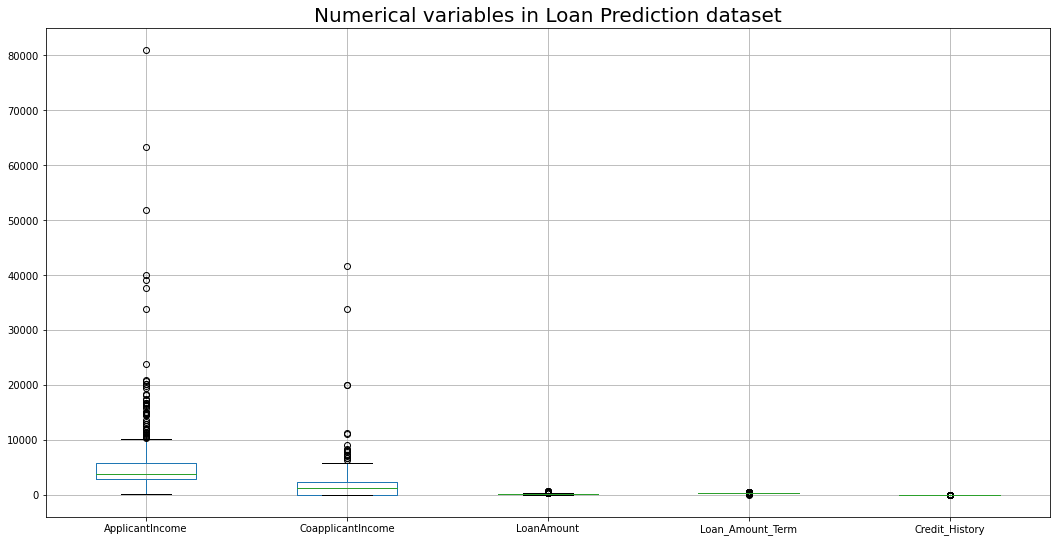

In [10]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(18,9))
dataset[num_cols].boxplot()
plt.title("Numerical variables in Loan Prediction dataset", fontsize=20)
plt.show()

Significant amount of outliers in applicant Income, Coapplicant Income (Non Normal distribution )

Categorical Variables Distribution

In [11]:
dataset.describe(include=['O'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Not anything Noteworthy

Graphing

                   ApplicantIncome  ...  Credit_History
ApplicantIncome           1.000000  ...       -0.014715
CoapplicantIncome        -0.116605  ...       -0.002056
LoanAmount                0.570909  ...       -0.008433
Loan_Amount_Term         -0.045306  ...        0.001470
Credit_History           -0.014715  ...        1.000000

[5 rows x 5 columns]


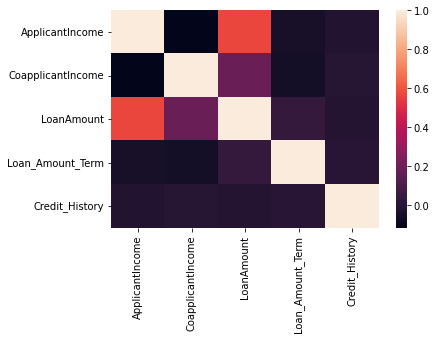

In [12]:
NumericVar= dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
CategoricalVar=dataset[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed', 'Property_Area']]

import seaborn as sns
print(NumericVar.corr())
sns.heatmap(NumericVar.corr())

Graphs to be seen to check if everything is Normal. (Pun Intended !!)

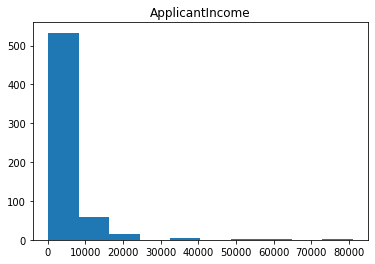

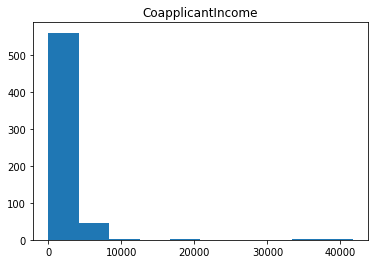

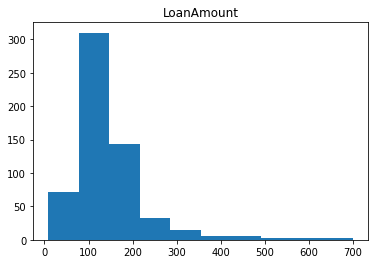

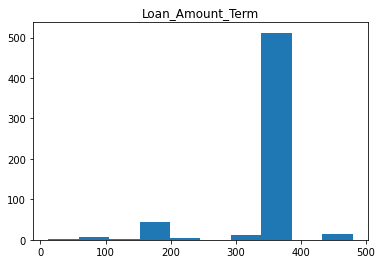

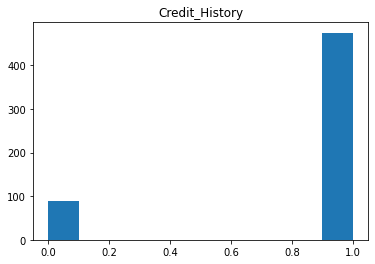

In [13]:
for i in NumericVar.columns:
    plt.hist(NumericVar[i])
    plt.title(i)
    plt.show()

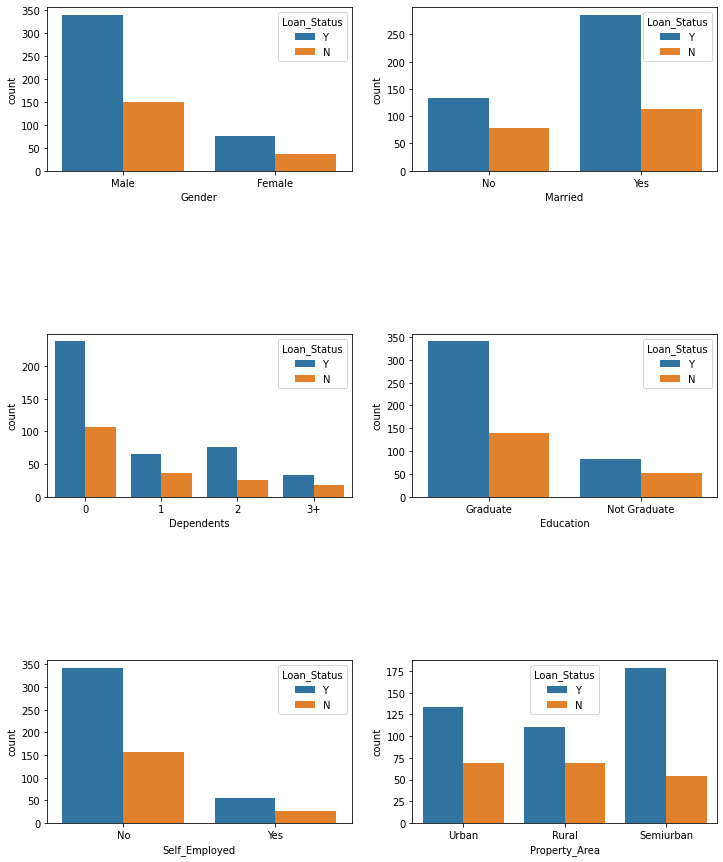

In [14]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(CategoricalVar):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=dataset,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

1. Loan Approval Status: average loan approval around 65%.
2. Sex: 489 males to only 112 Females
3. Martial Status: 3/5 of population is married 398:213 (Almost 4/6 = 2/3 
4. Married people get loan easier almost 7% more often
5. Dependents: 3/5 people haave no dependent
No dependent seems like positive for loan acceptance
6. Education: About 5/6th of the population is Highly Educated 10% morelikely to get loan 
7. Employment: has very less effect on loan guarantee, But most people are not self employed
8. Property Area: Semi Urbal Loans are easy to get




## Preprocessing

Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

1. Encoding Categorical Variables.
2. Adding missing values

In [15]:
Encoded_dataset = pd.get_dummies(dataset,drop_first=True)
Encoded_dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


Splitting X & Y

In [16]:
X = Encoded_dataset.drop(columns='Loan_Status_Y')
y = Encoded_dataset['Loan_Status_Y']

Missing Values

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [18]:
print(X[0,:])

[5.84900000e+03 0.00000000e+00 1.46412162e+02 3.60000000e+02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00]


Nothing is missing in Y

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Checking Y

In [ ]:
print(y)

Nothing is Normal Must Scale

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


## Training XGBoost on the Training set

In [23]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X, y)

XGBClassifier()

##Loading Testing Set

In [24]:
testdataset = pd.read_csv('test_lAUu6dG.csv')
X_test = testdataset.iloc[:, :-1].values
y_test = testdataset.iloc[:, -1].values

Doing Preprocessing for X test and Y test


In [25]:
testdataset.head()
testdataset = testdataset.drop(columns=['Loan_ID']) ##Removing the same Loan ID


Seems Like Everything is same for Test Set as well also to analyse it we must run the same treatmnt on it as well


In [26]:
Encoded_test = pd.get_dummies(testdataset,drop_first=True)
Encoded_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [27]:
X_test = Encoded_dataset.drop(columns='Loan_Status_Y')
y_test = Encoded_dataset['Loan_Status_Y']

Missing Values for X Test

In [28]:
imputertest = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_test)
X_test = imputer.transform(X_test)

Encoding Ytest

In [32]:
from sklearn.preprocessing import LabelEncoder
labele = LabelEncoder()
y_test = labele.fit_transform(y_test)

In [ ]:
print(y_test)

## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[107  85]
 [  9 413]]


0.8469055374592834

## Applying k-Fold Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.68 %
Standard Deviation: 3.82 %


In [38]:
print(y_pred)

[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 